<a href="https://colab.research.google.com/github/daniloisamu/projeto-include/blob/main/ProjetoMateusMacedoNogueiraU2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.signal
from scipy.signal import butter, sosfiltfilt

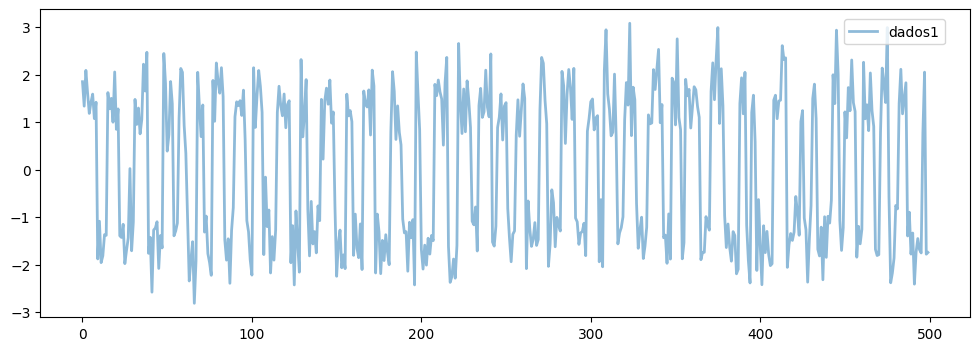

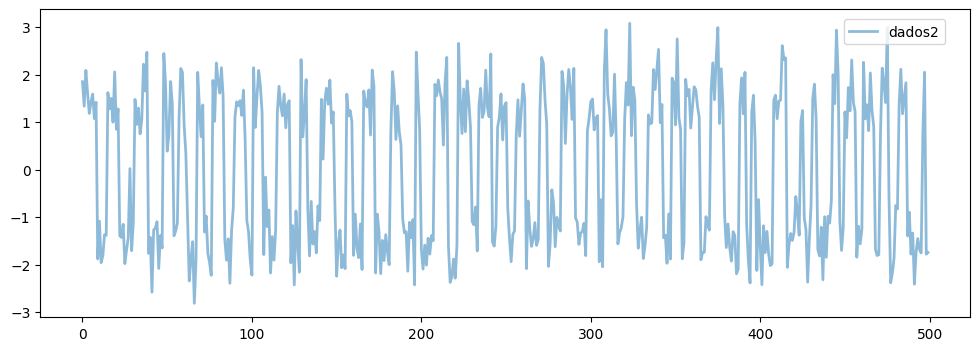

In [ ]:
data = np.loadtxt('dados_01.dat')
t = data[:,0]
u = data[:,1]
y = data[:,2]
plt.figure(figsize = (12,4))
plt.plot(t,y, lw = 2, alpha = .5, label = 'dados1')
plt.legend(loc = 'upper right', bbox_to_anchor = (.98,.99))
plt.show()
data2=np.loadtxt('dados_02.dat')
t2 = data2[:,0]
u2 = data2[:,1]
y2 = data2[:,2]
plt.figure(figsize = (12,4))
plt.plot(t,y, lw = 2, alpha = .5, label = 'dados2')
plt.legend(loc = 'upper right', bbox_to_anchor = (.98,.99))
plt.show()


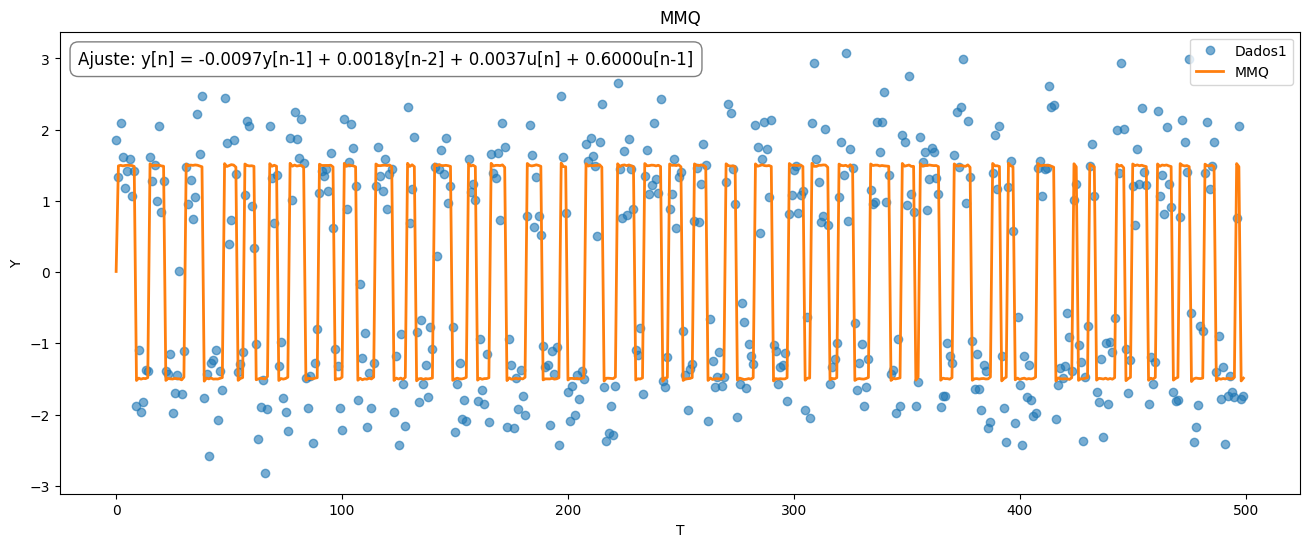

-0.009660891520136744
0.001802310913177333
0.0037208499954871966
0.6000492138618657
EMQ de Treinamento: 0.268056


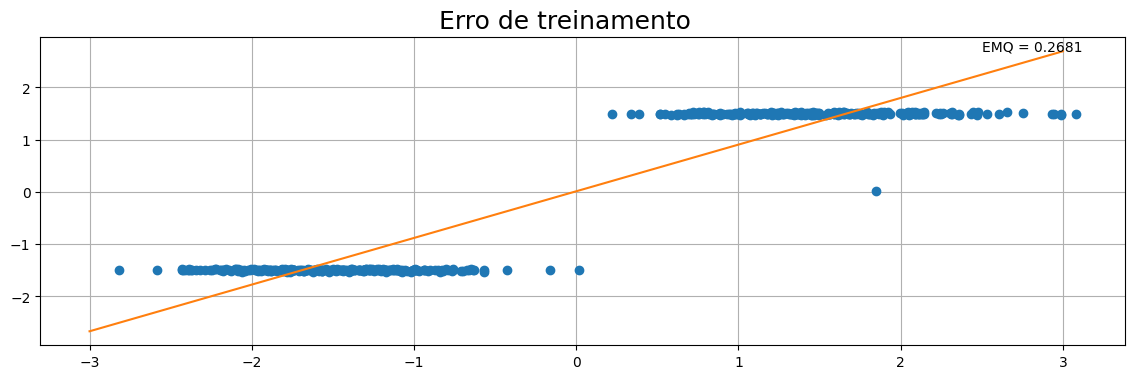

In [ ]:
#fazendo o MMQ do treinamento
N_treino = len(y)

y1_treino = np.concatenate(([0.0, 0.0], y)) # agora y = [0,0,(y original)]
u1_treino = np.concatenate(([0.0],u)) # e u = [0,u(original)]

g0 = y1_treino[1 : N_treino + 1] # Corresponde a y[n-1]
g1 = y1_treino[0 : N_treino]     # Corresponde a y[n-2]
g2 = u1_treino[1 : N_treino + 1] # Corresponde a u[n]
g3 = u1_treino[0 : N_treino]     # Corresponde a u[n-1]

A = np.array([
    [g0.T @ g0, g0.T @ g1, g0.T @ g2, g0.T @ g3],
    [g1.T @ g0, g1.T @ g1, g1.T @ g2, g1.T @ g3],
    [g2.T @ g0, g2.T @ g1, g2.T @ g2, g2.T @ g3],
    [g3.T @ g0, g3.T @ g1, g3.T @ g2, g3.T @ g3]
])

b = np.array([
    [g0.T @ y],
    [g1.T @ y],
    [g2.T @ y],
    [g3.T @ y]
])

w = la.solve(A, b)
g0, g1, g2, g3 = w.flatten()
f_treino = np.zeros_like(y)

for n in range(N_treino):
    f_treino[n] = g0 * y1_treino[n+1] + g1 * y1_treino[n] + g2 * u1_treino[n+1] + g3 * u1_treino[n]

plt.figure(figsize=(16, 6))
plt.plot(t,y, "o", label="Dados1", alpha=0.6)
plt.plot(t, f_treino,label="MMQ", linewidth=2)

fit_label = (
    'Ajuste: 'f'y[n] = {g0:.4f}y[n-1] + {g1:.4f}y[n-2] + {g2:.4f}u[n] + {g3:.4f}u[n-1]'
)
plt.text(0.015, 0.96, fit_label, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment="top", bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.5))

plt.xlabel("T")
plt.ylabel("Y")
plt.title("MMQ")
plt.legend(loc='upper right')
plt.show()

print(g0)
print(g1)
print(g2)
print(g3)

p = np.poly1d( np.polyfit(y, f_treino, 1) )
t = np.linspace(-3, 3, 500)
#
EMQ_treino = np.mean((y - f_treino)**2)
#
print(f"EMQ de Treinamento: {EMQ_treino:.6f}")
plt.figure(figsize = (14,4))
plt.suptitle("Erro de treinamento", fontsize=18, y=0.95)
plt.plot(y, f_treino, 'o', t, p(t), '-')
plt.text(2.5, 2.7, 'EMQ = %.4f' %EMQ_treino)
#plt.text(2.5, 2, 'STD = %.4f' %STD)
plt.grid(True)
plt.show()

In [ ]:
x1 = []
for i in range(2,len(t),1):
    x1.append(y[i-1]+y[i-2]+u[i-1]+u[i-2]+np.sin(y[i-1])+(u[i-1])**3)
print(x1, len(x1))

x2 = []
for i in range(2,len(t2),1):
    x2.append(y2[i-1]+y2[i-2]+u2[i-1]+u2[i-2]+np.sin(y2[i-1])+u2[i-1]**3)
print(x2, len(x2))

[np.float64(24.78249684773494), np.float64(24.9177796733386), np.float64(25.32438100533443), np.float64(24.344707812618054), np.float64(24.211053415315696), np.float64(24.628913532762486), np.float64(24.164801605286954), np.float64(-12.146308078650605), np.float64(-22.041670819587694), np.float64(-24.481780827501183), np.float64(-24.598886443882385), np.float64(-25.372581912174756), np.float64(-24.794097696831283), np.float64(11.885181923160083), np.float64(21.85851258072019), np.float64(24.48190191249578), np.float64(24.400551007928065), np.float64(23.961674634223797), np.float64(24.56222623927537), np.float64(24.274815441475525), np.float64(-12.544061051529544), np.float64(-21.72735816947517), np.float64(-24.440398486556997), np.float64(-24.122171945139158), np.float64(-24.67615973277894), np.float64(-25.294898432214975), np.float64(-24.75408533266834), np.float64(-22.026748370914223), np.float64(-23.306117440695786), np.float64(11.918559008079137), np.float64(21.994219486951494), np

In [ ]:
u1 = u[2:]
u2 = u2[2:]
y1 = y[2:]
y2 = y2[2:]
t1 = t[2:]
t2 = t2[2:]

[-26.03160921  -8.59282244   8.84596432  26.28475109]
0.2944635601502969


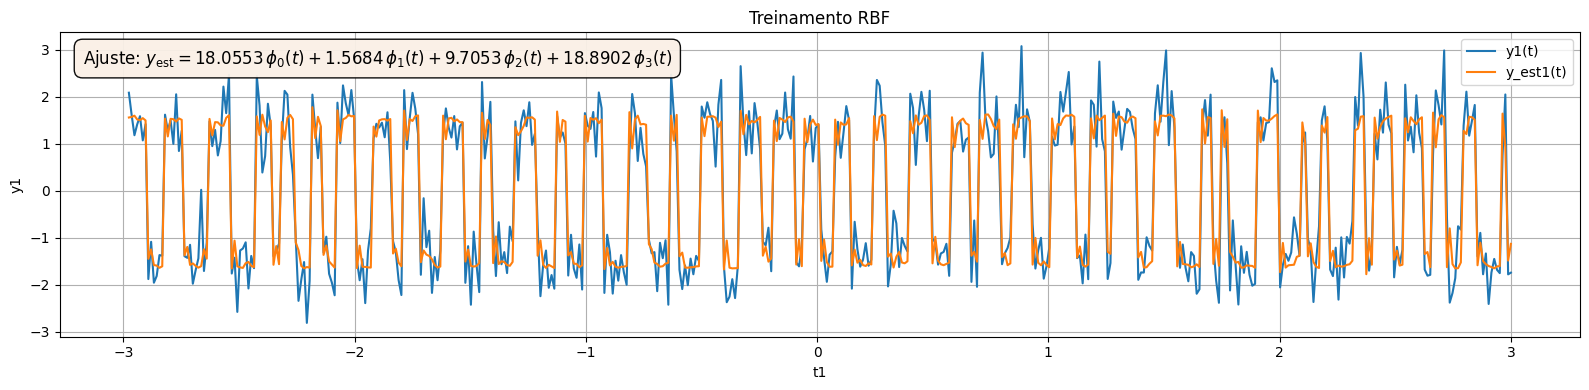

0.2944635601502969


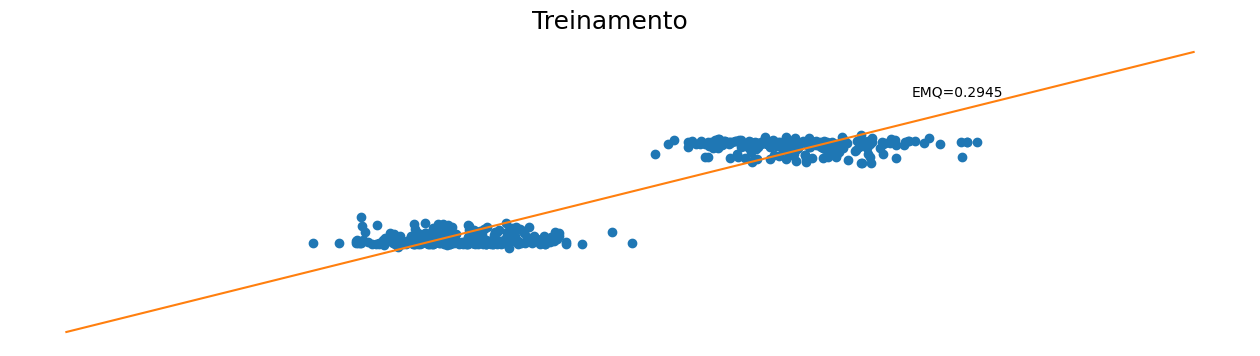

In [ ]:
#rbf treinamneto
c = np.linspace(min(x1), max(x1), 4) #centros
sigma = 5.0
print(c)
Phi1 = np.zeros(shape = (len(x1), len(c)))
for i in range(Phi1.shape[0]):
  for j in range(Phi1.shape[1]):
    Phi1[i][j] = np.exp(-(2*sigma**2)**-1 * abs(x1[i] - c[j])**2)

w = la.pinv(Phi1) @ y1
y_est1 = Phi1@w
EQM1 = 0
for i in range(len(y1)):
    EQM1 += (y1[i] - y_est1[i])**2
EQM1 /= len(y1)
print(EQM1)
plt.figure(figsize=(16, 4))
plt.plot(t1, y1, label='y1(t)')
plt.plot(t1, y_est1, label='y_est1(t)')
plt.xlabel('t1')
plt.ylabel('y1')
plt.title('Treinamento RBF')
formula_rbf_treino = (
    r'Ajuste: '
    r'$y_{\mathrm{est}} = 18.0553\,\phi_0(t) + 1.5684\,\phi_1(t) + '
    r'9.7053\,\phi_2(t) + 18.8902\,\phi_3(t)$'
)

plt.text(0.015, 0.95, formula_rbf_treino, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment="top",
         bbox=dict(boxstyle="round,pad=0.5", facecolor='linen', alpha=0.95))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
EMQ1 = 0
for i in range(len(y1)):
    EMQ1 += (y1[i] - y_est1[i])**2
EMQ1 /= len(y1)
print(EMQ1)
p = np.poly1d( np.polyfit(y1, y_est1, 1) )
t = np.linspace(-5, 5, 500)
plt.figure(figsize = (16,4))
plt.text(2.5,3.0,'EMQ=%.4f' %EMQ1)
plt.suptitle("Treinamento", fontsize=18, y=0.95)
plt.plot(y1, y_est1, 'o', t, p(t), '-')
plt.axis('off')
plt.show()

EMQ de Teste: 1.208201


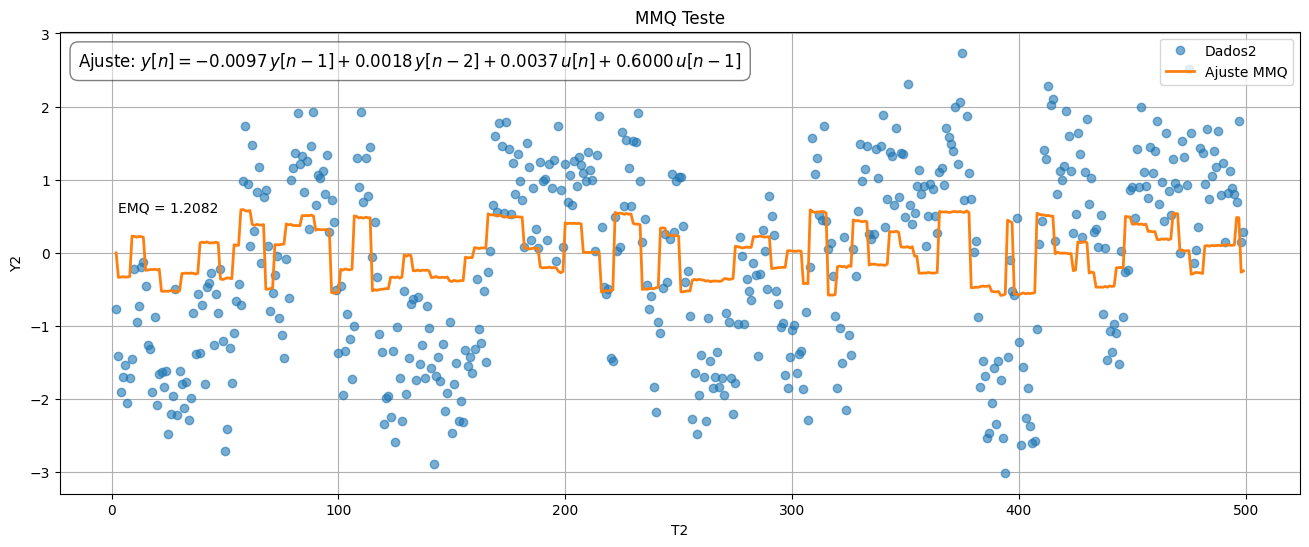

In [ ]:
# teste mmq
g0 = -0.0097
g1 = 0.0018
g2 = 0.0037
g3 = 0.6000
y1_teste = np.concatenate(([0.0, 0.0], y2))
u1_teste = np.concatenate(([0.0], u2))
t2 = t2
y2 = y2
u2 = u2
N_teste = len(y2)

f_teste = np.zeros_like(y2)
for n in range(N_teste):
    f_teste[n] = g0 * y1_teste[n+1] + g1 * y1_teste[n] + g2 * u1_teste[n+1] + g3 * u1_teste[n]
EMQ_teste = np.mean((y2 - f_teste)**2)
print(f"EMQ de Teste: {EMQ_teste:.6f}")
# Plot com a fórmula do MMQ no gráfico
plt.figure(figsize=(16, 6))
plt.plot(t2, y2, "o", label="Dados2", alpha=0.6)
plt.plot(t2, f_teste, label="Ajuste MMQ", linewidth=2)
plt.text(0.95 * max(y2), 0.95 * max(f_teste), f'EMQ = {EMQ_teste:.4f}')
fit_label = (
    'Ajuste: ' +
    r'$y[n] = -0.0097\,y[n-1] + 0.0018\,y[n-2] + 0.0037\,u[n] + 0.6000\,u[n-1]$'
)
plt.text(0.015, 0.96, fit_label, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment="top", bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.5))

plt.xlabel("T2")
plt.ylabel("Y2")
plt.title("MMQ Teste")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

0.3842952131942562


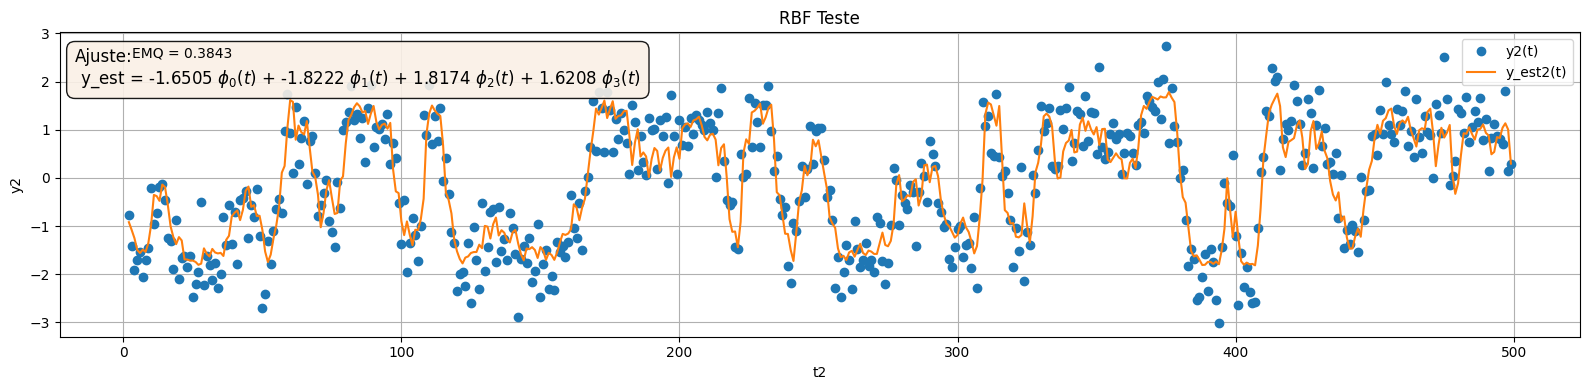

In [ ]:
# teste rbf
Phi2 = np.zeros(shape = (len(x2), len(c)))
for i in range(Phi2.shape[0]):
  for j in range(Phi2.shape[1]):
    Phi2[i][j] = np.exp(-(2*sigma**2)**-1 * abs(x2[i] - c[j])**2)

y_est2 = Phi2 @ w
EMQ2 = 0
for i in range(len(y2)):
    EMQ2 += (y2[i] - y_est2[i])**2
EMQ2 /= len(y2)
print(EMQ2)
formula_rbf = 'Ajuste:\n y_est = %.4f $\\phi_0(t)$ + %.4f $\\phi_1(t)$ + %.4f $\\phi_2(t)$ + %.4f $\\phi_3(t)$' % (
    w[0].item(), w[1].item(), w[2].item(), w[3].item())
plt.figure(figsize=(16, 4))
plt.plot(t2, y2,'o', label='y2(t)')
plt.plot(t2, y_est2, label='y_est2(t)')
plt.text(0.01, 0.95, formula_rbf, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment="top", bbox=dict(boxstyle="round,pad=0.5", facecolor='linen', alpha=0.9))
plt.xlabel('t2')
plt.ylabel('y2')
plt.text(3.0,2.5,'EMQ = %.4f' %EMQ2)
plt.title('RBF Teste')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


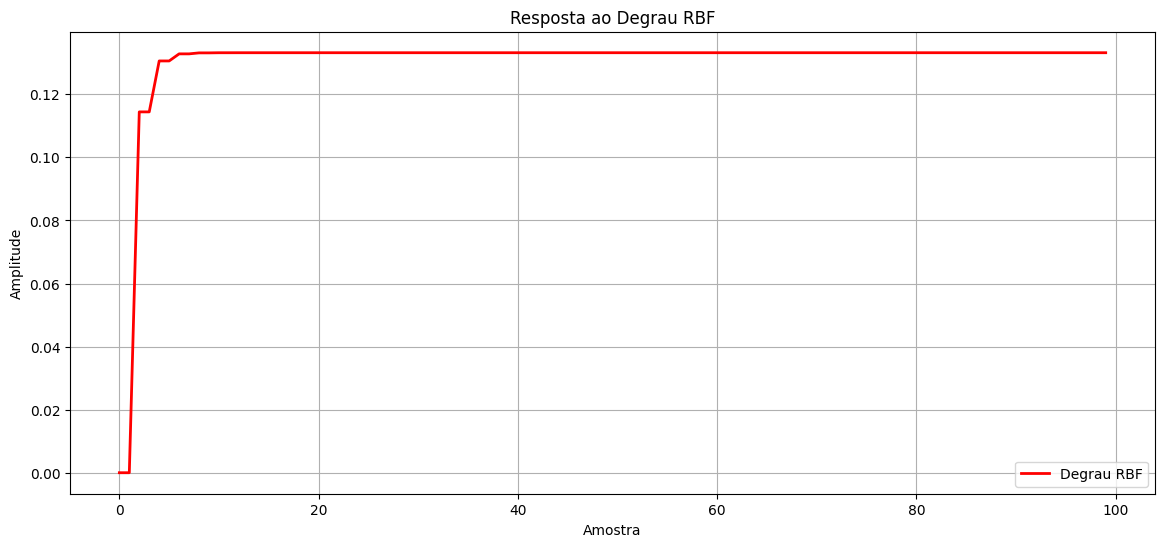

In [ ]:
#validação
N_degrau = 100
t_degrau = np.arange(N_degrau)
u_degrau = np.ones(N_degrau)
y_degrau = np.zeros(N_degrau)

for n in range(2, N_degrau):
    x0_degrau = y_degrau[n - 1]
    x1_degrau = y_degrau[n - 2]
    x2_degrau = u_degrau[n]
    x3_degrau = u_degrau[n - 1]

    y0_degrau = np.exp(- (1 / (2 * sigma**2)) * (x0_degrau - c[0])**2)
    y1_degrau = np.exp(- (1 / (2 * sigma**2)) * (x1_degrau - c[1])**2)
    y2_degrau = np.exp(- (1 / (2 * sigma**2)) * (x2_degrau - c[2])**2)
    y3_degrau = np.exp(- (1 / (2 * sigma**2)) * (x3_degrau - c[3])**2)

    phi_degrau = np.array([y0_degrau, y1_degrau, y2_degrau, y3_degrau])

    y_degrau[n] = phi_degrau @ w

plt.figure(figsize=(14, 6))
plt.plot(t_degrau, y_degrau, "-r", label="Degrau RBF", linewidth=2)
plt.title("Resposta ao Degrau RBF")
plt.xlabel("Amostra")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

O modelo de ajuste de curvas usando funções de domínio complexo ortogonais é mais robusto que usando o método dos mínimos quadrados (MMQ), isto pode ser verificado analisando os valores obtidos do
A RBF é mais robusta que o MMQ pois consegue analisar comportamentos não lineares do sistema, se tornando menos sensiveis e se modelando mais suavemente á ruidos. Agora o MMQ por ser um ajuste linear apresentou problemas ao se análisar esse tipo de dados complexos.